In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

In [2]:
# get the data and consolidate it into one
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape, test_df.shape)

df = pd.concat([train_df, test_df])

df.shape

(7352, 563) (2947, 563)


(10299, 563)

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
features = df.columns.values.tolist()
unique_sensors = sorted(set([feature.split('-')[0] for feature in features]))
print(f'Sensors:')
for sensor in unique_sensors: print(sensor)

Sensors:
Activity
angle(X,gravityMean)
angle(Y,gravityMean)
angle(Z,gravityMean)
angle(tBodyAccJerkMean),gravityMean)
angle(tBodyAccMean,gravity)
angle(tBodyGyroJerkMean,gravityMean)
angle(tBodyGyroMean,gravityMean)
fBodyAcc
fBodyAccJerk
fBodyAccMag
fBodyBodyAccJerkMag
fBodyBodyGyroJerkMag
fBodyBodyGyroMag
fBodyGyro
subject
tBodyAcc
tBodyAccJerk
tBodyAccJerkMag
tBodyAccMag
tBodyGyro
tBodyGyroJerk
tBodyGyroJerkMag
tBodyGyroMag
tGravityAcc
tGravityAccMag


In [5]:
# Checking in case there is any duplicated column
df.columns.duplicated().sum()

0

In [6]:
# See the different types of activities
unique_activities = df['Activity'].unique()
unique_activities

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Hence we see a mix of equi-level movelement (walking), no movement (standing, sitting, laying), and multi-level movement (walking downstairs, walking upstairs). Logic tells us that regarding position, equi-level movement will have less rise in altitude compared to using the stairs

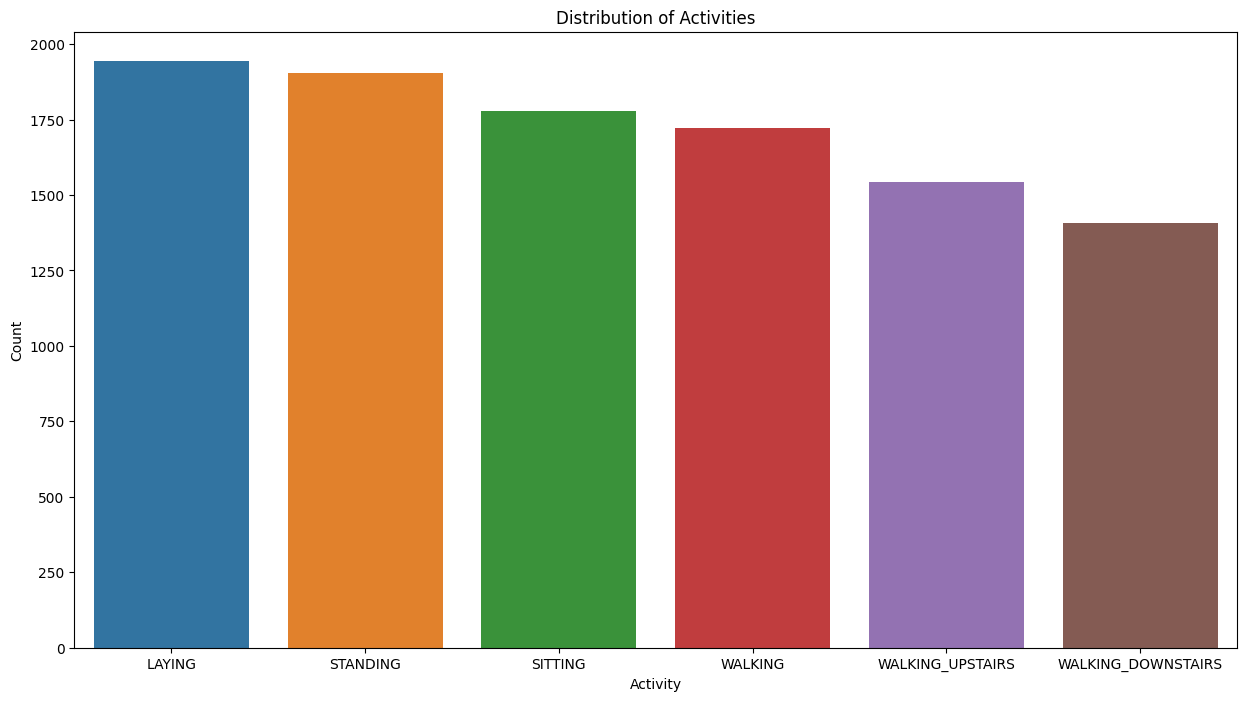

In [7]:
# Check the distribution of the activities
val_counts = df['Activity'].value_counts()

# plotting distribution
plt.figure(figsize=(15, 8))
sns.barplot(x=val_counts.index, y=val_counts.values)
plt.title('Distribution of Activities')
plt.ylabel('Count')
plt.xlabel('Activity')
plt.show()

Laying is the most popular activity. Not super surprising.

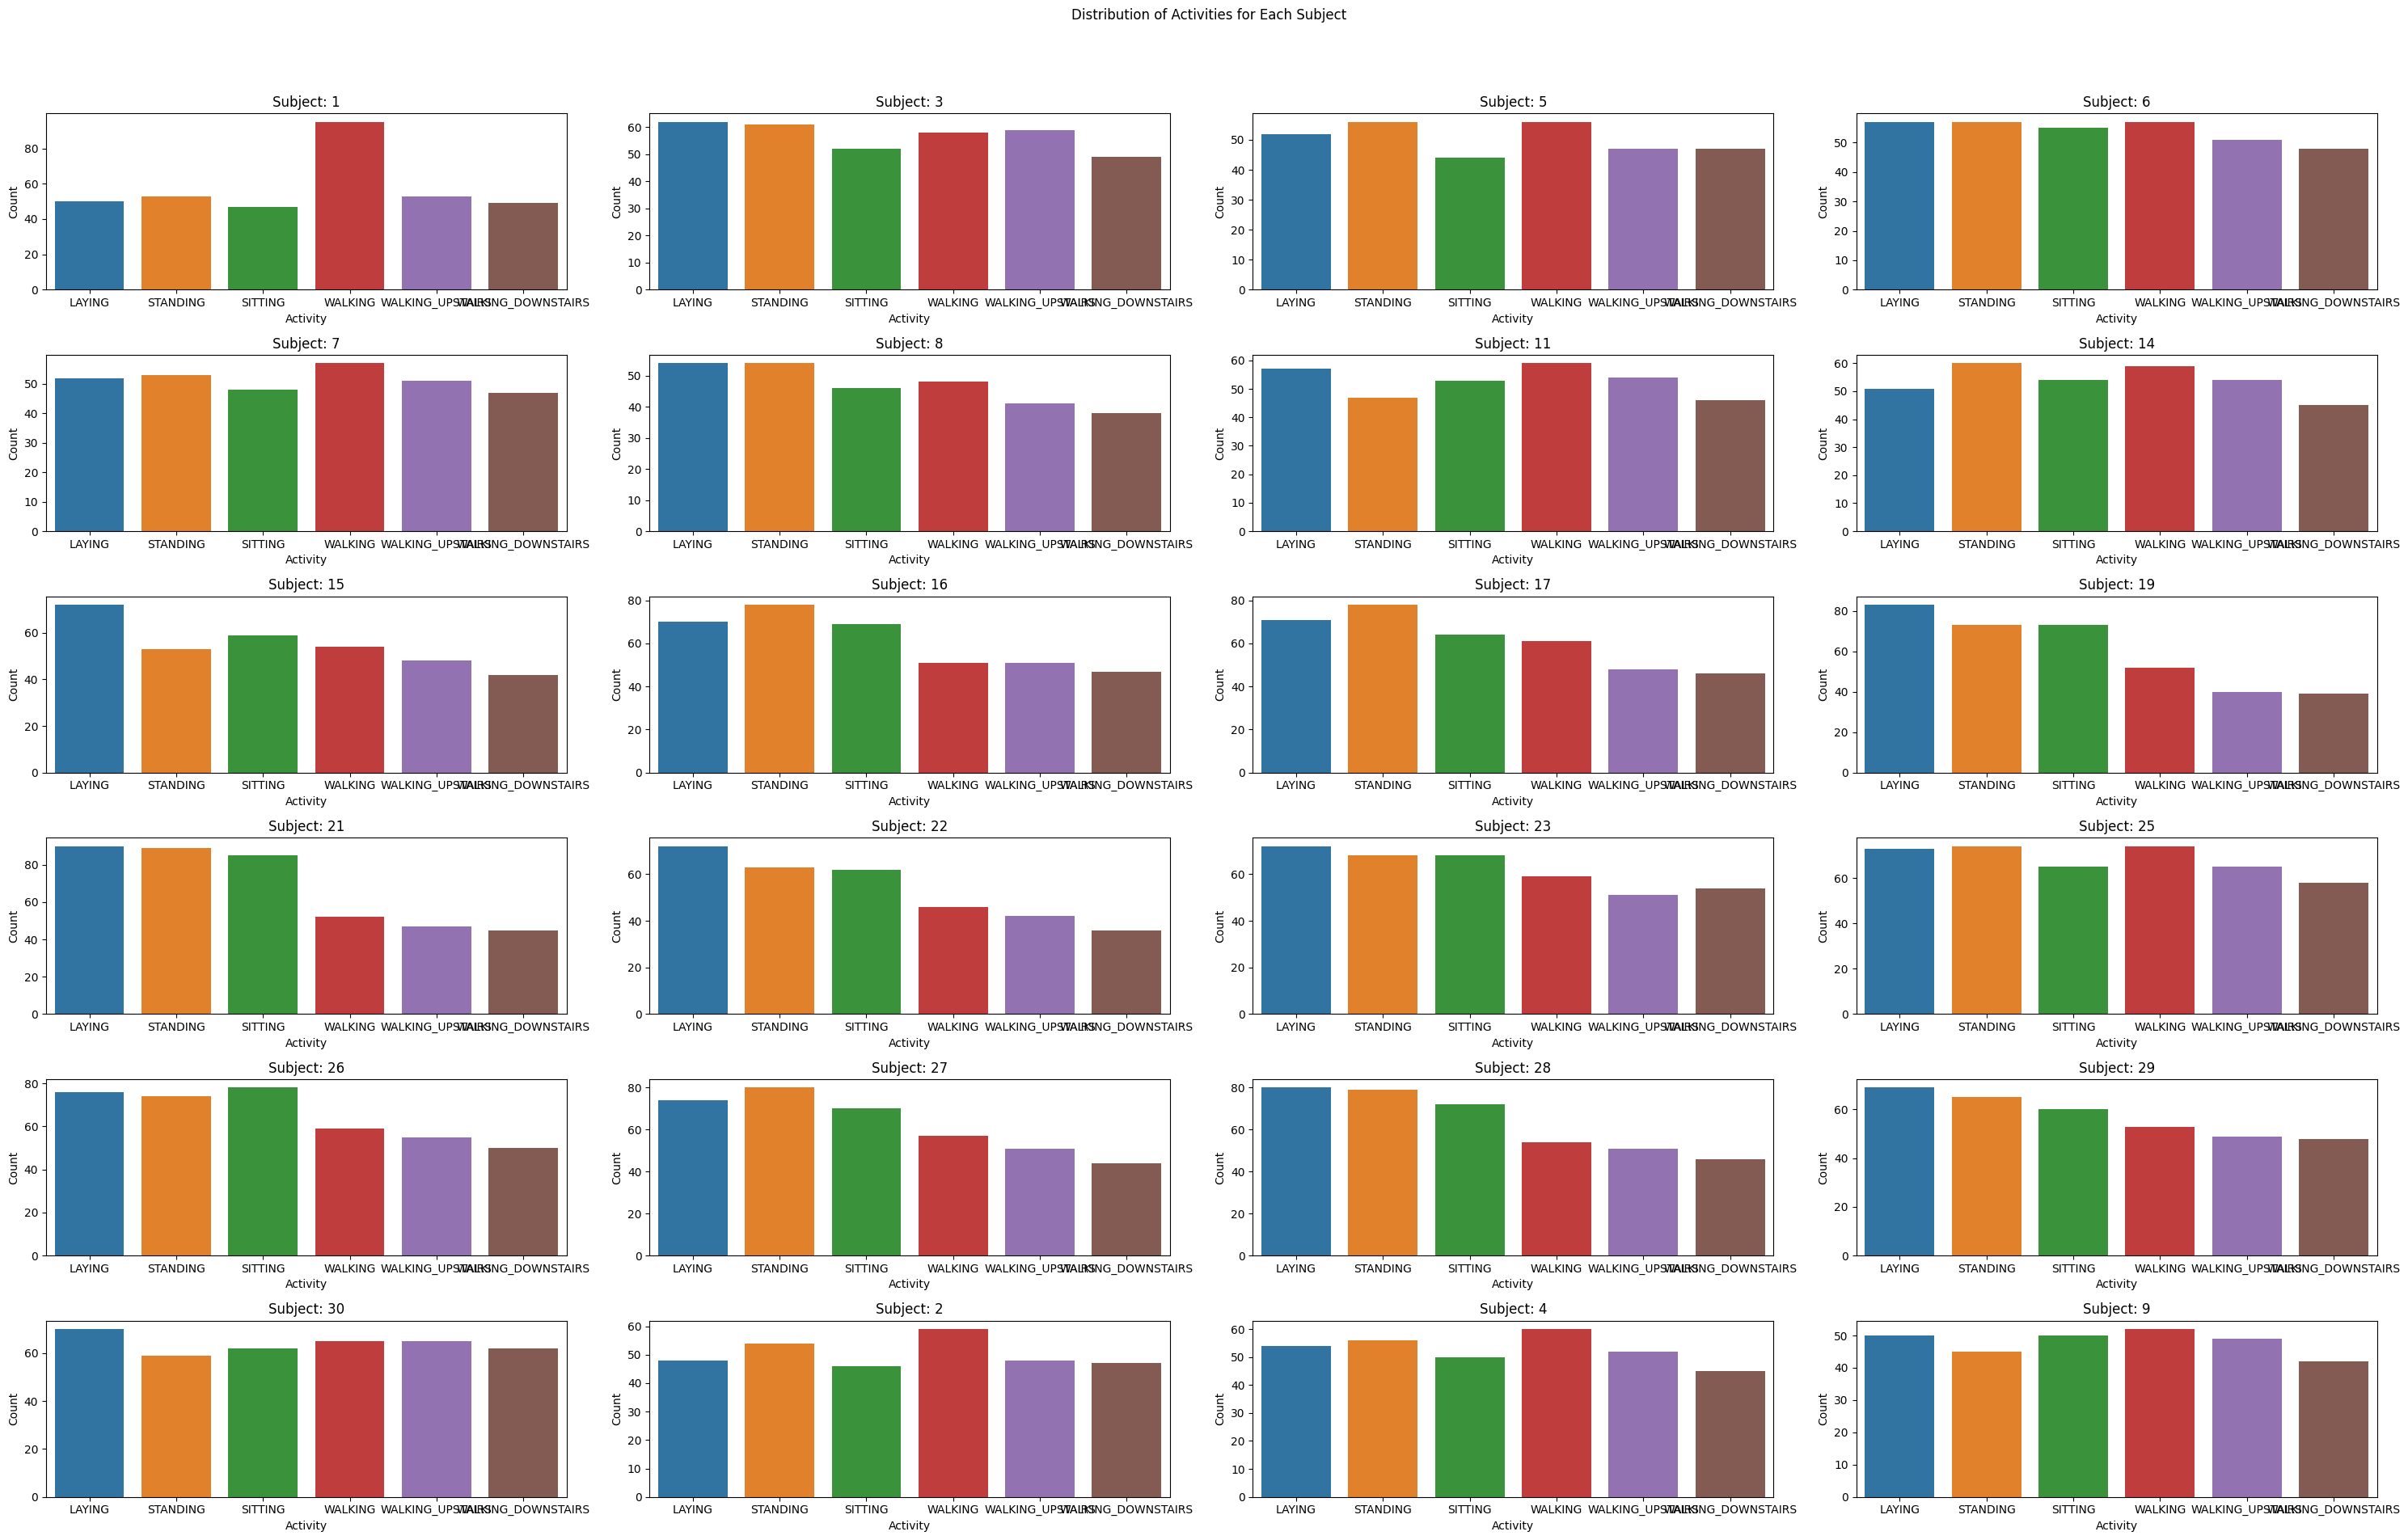

In [13]:
unique_subjects = df['subject'].unique()
n_subjects = len(unique_subjects)
rows = math.ceil(n_subjects / 5)
cols = 4

# Order the activities beforehand so that they are in the same order every time
activity_order = df['Activity'].value_counts().index.tolist()

fig, axes = plt.subplots(rows, cols, figsize=(30, 20))
fig.suptitle('Distribution of Activities for Each Subject')

for i, ax in enumerate(axes.flatten()):
    if i < n_subjects:
        # Filter the DataFrame for the current subject
        subject_df = df[df['subject'] == unique_subjects[i]]

        # Plotting the histogram with a consistent activity order
        sns.barplot(x=subject_df['Activity'].value_counts().index, 
                    y=subject_df['Activity'].value_counts().values, 
                    order=activity_order,  # Use the global order
                    ax=ax)

        ax.set_title(f'Subject: {unique_subjects[i]}')
        ax.set_xlabel('Activity')
        ax.set_ylabel('Count')
    else:
        fig.delaxes(ax)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


These plots represent the activity each subject has done. From this plot, we can confirm that each subject in this experiment were subjected to every single activity. 

In [14]:
# Group by 'subject' and count the number of rows for each subject
subject_row_counts = df.groupby('subject').size()

# Display the result
# print(subject_row_counts)

subject_row_counts_df = subject_row_counts.reset_index(name='Count')
# print(subject_row_counts_df)

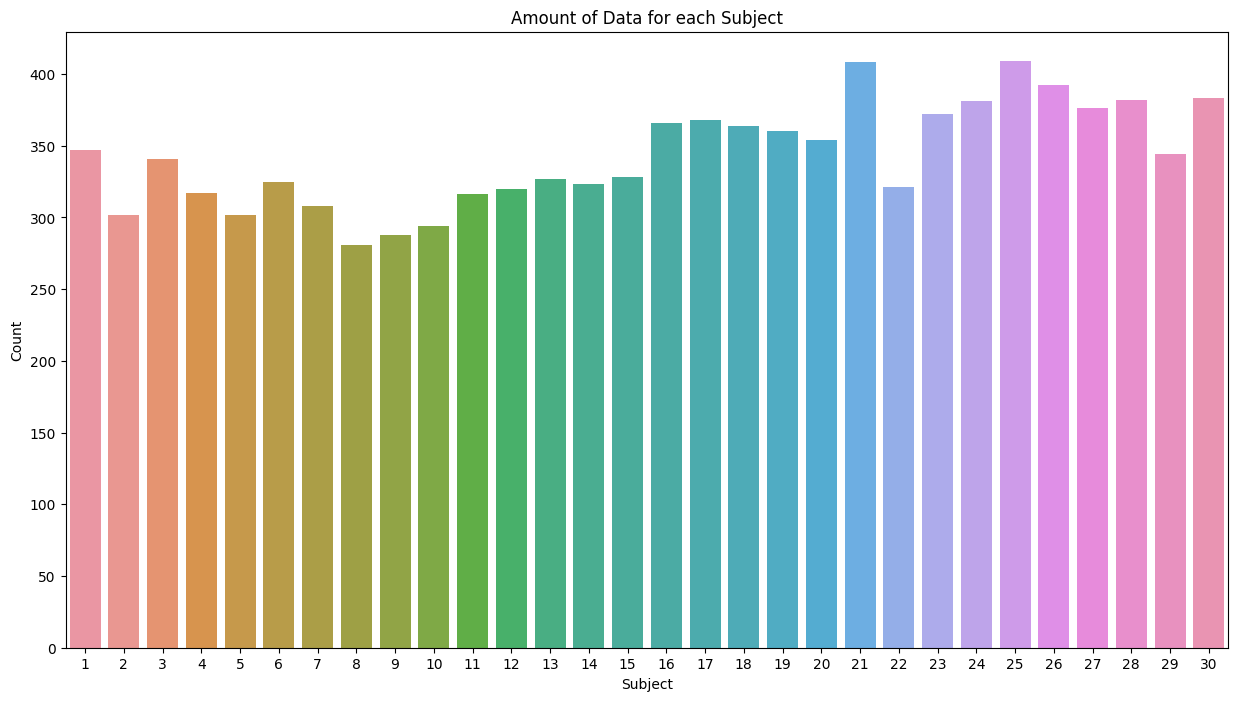

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x=subject_row_counts_df['subject'].values, y=subject_row_counts_df['Count'].values)
plt.title('Amount of Data for each Subject')
plt.ylabel('Count')
plt.xlabel('Subject')
plt.show()